<a href="https://colab.research.google.com/github/UmarKhattab09/NLP/blob/main/FakeNewsClassifierUsingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fake News Classifier Using LSTM

Dataset : https://github.com/raj1603chdry/Fake-News-Detection-System/blob/master/datasets/train.csv

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,label,news
0,False,Says the Annies List political group supports ...
1,True,When did the decline of coal start? It started...
2,True,"Hillary Clinton agrees with John McCain ""by vo..."
3,False,Health care reform legislation is likely to ma...
4,True,The economic turnaround started at the end of ...


In [4]:
df.shape

(10240, 2)

In [5]:
df.head()

,label,news
0,False,Says the Annies List political group supports ...
1,True,When did the decline of coal start? It started...
2,True,"Hillary Clinton agrees with John McCain ""by vo..."
3,False,Health care reform legislation is likely to ma...
4,True,The economic turnaround started at the end of ...


In [6]:
df.isnull().sum()

,0
label,0
news,0


In [7]:
###Drop Nan Values
df=df.dropna()


In [8]:
df.head()

,label,news
0,False,Says the Annies List political group supports ...
1,True,When did the decline of coal start? It started...
2,True,"Hillary Clinton agrees with John McCain ""by vo..."
3,False,Health care reform legislation is likely to ma...
4,True,The economic turnaround started at the end of ...


In [9]:
## Get the Independent Features

X=df.drop('label',axis=1)

In [10]:
## Get the Dependent features
y=df['label']

In [11]:
X.shape

(10240, 1)

In [12]:
y.shape

(10240,)

In [13]:
import tensorflow as tf

In [14]:
tf.__version__

'2.18.0'

In [15]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [16]:
### Vocabulary size
voc_size=5000

### Onehot Representation

In [17]:
messages=X.copy()

In [18]:
messages['news'][1]

'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'

In [19]:
messages

,news
0,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."
3,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...
...,...
10235,There are a larger number of shark attacks in ...
10236,Democrats have now become the party of the [At...
10237,Says an alternative to Social Security that op...
10238,On lifting the U.S. Cuban embargo and allowing...


In [20]:
#messages.reset_index(inplace=True)

In [21]:
messages

,news
0,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."
3,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...
...,...
10235,There are a larger number of shark attacks in ...
10236,Democrats have now become the party of the [At...
10237,Says an alternative to Social Security that op...
10238,On lifting the U.S. Cuban embargo and allowing...


In [22]:
import nltk
import re
from nltk.corpus import stopwords

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['news'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [25]:
corpus[1]

'declin coal start start natur ga took start begin presid georg w bush administr'

In [26]:
messages['news'][1]

'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.'

In [27]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]


In [28]:
corpus[1]

'declin coal start start natur ga took start begin presid georg w bush administr'

In [29]:
onehot_repr[1]

[4609,
 3088,
 1757,
 1757,
 3822,
 1298,
 539,
 1757,
 4568,
 4011,
 1100,
 3625,
 3409,
 262]

### Embedding Representation

In [30]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[3203  312 1684 ...    0    0    0]
 [4609 3088 1757 ...    0    0    0]
 [3666 1240  813 ...    0    0    0]
 ...
 [3203  501 1869 ...    0    0    0]
 [1862  536  132 ...    0    0    0]
 [2468 4423  100 ...    0    0    0]]


In [31]:
embedded_docs[1]

array([4609, 3088, 1757, 1757, 3822, 1298,  539, 1757, 4568, 4011, 1100,
       3625, 3409,  262,    0,    0,    0,    0,    0,    0], dtype=int32)

In [32]:
embedded_docs[0]

array([3203,  312, 1684, 2013, 1380, 4185, 4391,  993, 3007, 2533,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [33]:
## Creating model
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
len(embedded_docs),y.shape

(10240, (10240,))

In [35]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [36]:
X_final.shape,y_final.shape

((10240, 20), (10240,))

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### Model Training

In [38]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5588 - loss: 0.6890 - val_accuracy: 0.6009 - val_loss: 0.6805
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6399 - loss: 0.6540 - val_accuracy: 0.5935 - val_loss: 0.6620
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7167 - loss: 0.5671 - val_accuracy: 0.5855 - val_loss: 0.6939
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7535 - loss: 0.5175 - val_accuracy: 0.5790 - val_loss: 0.7265
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7906 - loss: 0.4755 - val_accuracy: 0.5734 - val_loss: 0.7620
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8174 - loss: 0.4344 - val_accuracy: 0.5766 - val_loss: 0.8840
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8290 - loss: 0.4050 - val_accuracy: 0.5828 - val_loss: 0.8841
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8570 - loss: 0.3646 - val_accuracy: 0

### Performance Metrics And Accuracy

In [39]:
y_pred=model.predict(X_test)

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [40]:
from sklearn.metrics import confusion_matrix

In [42]:
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve
confusion_matrix(y_test,y_pred)

array([[ 822,  634],
       [ 831, 1093]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

y_test shape: (3380,)
y_pred shape: (3380,)
y_false shape: (3380,)


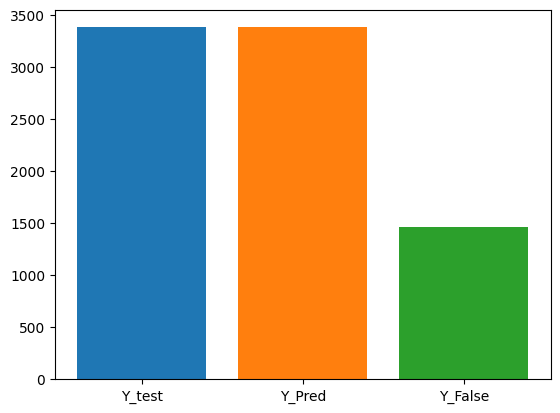

In [47]:

y_false = y_test != y_pred
y_false = y_false.astype(int)
len(y_false)
np.sum(y_false)

y_test = y_test.reshape(-1)
y_pred = y_pred.reshape(-1)

print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("y_false shape:", y_false.shape)
np.sum(y_false)


import matplotlib.pyplot as plt

fig, ax = plt.subplots()

test = ['Y_test', 'Y_Pred', 'Y_False']
counts = [len(y_test), len(y_pred), np.sum(y_false)]
bar_labels = ['Y_test', 'Y_Pred', 'Y_False']
bar_colors = ['tab:blue', 'tab:orange', 'tab:green']

ax.bar(test, counts, label=bar_labels, color=bar_colors)


plt.show()